Before we get started, a couple of reminders to keep in mind when using iPython notebooks:

- Remember that you can see from the left side of a code cell when it was last run if there is a number within the brackets.
- When you start a new notebook session, make sure you run all of the cells up to the point where you last left off. Even if the output is still visible from when you ran the cells in your previous session, the kernel starts in a fresh state so you'll need to reload the data, etc. on a new session.
- The previous point is useful to keep in mind if your answers do not match what is expected in the lesson's quizzes. Try reloading the data and run all of the processing steps one by one in order to make sure that you are working with the same variables and data that are at each quiz stage.


## Load Data from CSVs

In [1]:
import unicodecsv

## Longer version of code (replaced with shorter, equivalent version below)

# enrollments = []
# f = open('enrollments.csv', 'rb')
# reader = unicodecsv.DictReader(f)
# for row in reader:
#     enrollments.append(row)
# f.close()

with open('enrollments.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    enrollments = list(reader)

In [2]:
#####################################
#                 1                 #
#####################################

## Read in the data from daily_engagement.csv and project_submissions.csv 
## and store the results in the below variables.
## Then look at the first row of each table.
with open('daily_engagement.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    daily_engagement = list(reader)
with open('project_submissions.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    project_submissions = list(reader)

print "enrollments\n", enrollments[0]
print
print "daily_engagement\n", daily_engagement[0]
print
print "project_submissions\n", project_submissions[0]

enrollments
{u'status': u'canceled', u'is_udacity': u'True', u'is_canceled': u'True', u'join_date': u'2014-11-10', u'account_key': u'448', u'cancel_date': u'2015-01-14', u'days_to_cancel': u'65'}

daily_engagement
{u'lessons_completed': u'0.0', u'num_courses_visited': u'1.0', u'total_minutes_visited': u'11.6793745', u'projects_completed': u'0.0', u'acct': u'0', u'utc_date': u'2015-01-09'}

project_submissions
{u'lesson_key': u'3176718735', u'processing_state': u'EVALUATED', u'account_key': u'256', u'assigned_rating': u'UNGRADED', u'completion_date': u'2015-01-16', u'creation_date': u'2015-01-14'}


## Fixing Data Types

In [3]:
from datetime import datetime as dt

# Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

# Clean up the data types in the enrollments table
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
enrollments[0]

{u'account_key': u'448',
 u'cancel_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'days_to_cancel': 65,
 u'is_canceled': True,
 u'is_udacity': True,
 u'join_date': datetime.datetime(2014, 11, 10, 0, 0),
 u'status': u'canceled'}

In [4]:
# Clean up the data types in the engagement table
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
daily_engagement[0]

{u'acct': u'0',
 u'lessons_completed': 0,
 u'num_courses_visited': 1,
 u'projects_completed': 0,
 u'total_minutes_visited': 11.6793745,
 u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

In [5]:
# Clean up the data types in the submissions table
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions[0]

{u'account_key': u'256',
 u'assigned_rating': u'UNGRADED',
 u'completion_date': datetime.datetime(2015, 1, 16, 0, 0),
 u'creation_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'lesson_key': u'3176718735',
 u'processing_state': u'EVALUATED'}

Note when running the above cells that we are actively changing the contents of our data variables. If you try to run these cells multiple times in the same session, an error will occur.

## Investigating the Data

In [6]:
#####################################
#                 2                 #
#####################################

## Find the total number of rows and the number of unique students (account keys)
## in each table.
def count_unique_id(data, key):
    # sets only add an item if its not already in there (unordered)
    unique_ids = set()
    for row in data:
        unique_ids.add(row[key])
    return len(unique_ids)

enrollment_num_rows = len(enrollments)
enrollment_num_unique_students = count_unique_id(enrollments, 'account_key')
print enrollment_num_rows, "enrollment_num_rows"
print enrollment_num_unique_students, "enrollment_num_unique_students"
print


engagement_num_rows = len(daily_engagement)
engagement_num_unique_students = count_unique_id(daily_engagement, 'acct')
print engagement_num_rows, "engagement_num_rows"
print engagement_num_unique_students, "engagement_num_unique_students"
print

submission_num_rows = len(project_submissions)
submission_num_unique_students = count_unique_id(project_submissions, 'account_key')
print submission_num_rows, "submission_num_rows"
print submission_num_unique_students, "submission_num_unique_students"


1640 enrollment_num_rows
1302 enrollment_num_unique_students

136240 engagement_num_rows
1237 engagement_num_unique_students

3642 submission_num_rows
743 submission_num_unique_students


## Problems in the Data

In [7]:
#####################################
#                 3                 #
#####################################

## Rename the "acct" column in the daily_engagement table to "account_key".
for row in daily_engagement:
    if 'acct' in row:
      val = row['acct']
      row['account_key'] = val
      del row['acct']
print daily_engagement[0]

{u'lessons_completed': 0, u'num_courses_visited': 1, u'total_minutes_visited': 11.6793745, u'projects_completed': 0, 'account_key': u'0', u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}


## Missing Engagement Records

In [8]:
#####################################
#                 4                 #
#####################################

## Find any one student enrollments where the student is missing from the daily engagement table.
## Output that enrollment.
engaged_students = set()
for engagement in daily_engagement:
    engaged_students.add(engagement['account_key'])
    
for enrollment in enrollments:
    student = enrollment['account_key']
    if student not in engaged_students:
        print student
        break
print enrollment
print        

1219
{u'status': u'canceled', u'is_udacity': False, u'is_canceled': True, u'join_date': datetime.datetime(2014, 11, 12, 0, 0), u'account_key': u'1219', u'cancel_date': datetime.datetime(2014, 11, 12, 0, 0), u'days_to_cancel': 0}



## Checking for More Problem Records

In [9]:
#####################################
#                 5                 #
#####################################

## Find the number of surprising data points (enrollments missing from
## the engagement table) that remain, if any.
num_unengaged_students = 0
num_unengaged_students_enrolled_at_least_1_day = 0
unengaged_students_enrolled_at_least_1_day = []
for enrollment in enrollments:
    student = enrollment['account_key']
    if student not in engaged_students:
        num_unengaged_students += 1
        if enrollment['join_date'] != enrollment['cancel_date']:
            unengaged_students_enrolled_at_least_1_day.append(enrollment) 
            num_unengaged_students_enrolled_at_least_1_day += 1
            print student
            print enrollment
print
print num_unengaged_students, "students cancelled same day"
print num_unengaged_students_enrolled_at_least_1_day, "enrolled at least one day"

1304
{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2015, 1, 10, 0, 0), u'account_key': u'1304', u'cancel_date': datetime.datetime(2015, 3, 10, 0, 0), u'days_to_cancel': 59}
1304
{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2015, 3, 10, 0, 0), u'account_key': u'1304', u'cancel_date': datetime.datetime(2015, 6, 17, 0, 0), u'days_to_cancel': 99}
1101
{u'status': u'current', u'is_udacity': True, u'is_canceled': False, u'join_date': datetime.datetime(2015, 2, 25, 0, 0), u'account_key': u'1101', u'cancel_date': None, u'days_to_cancel': None}

71 students cancelled same day
3 enrolled at least one day


## Tracking Down the Remaining Problems

In [10]:
# Create a set of the account keys for all Udacity test accounts
udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])
len(udacity_test_accounts)

6

In [11]:
# Given some data with an account_key field, removes any records corresponding to Udacity test accounts
def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data

In [12]:
# Remove Udacity test accounts from all three tables
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement  = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print len(non_udacity_enrollments)
print len(non_udacity_engagement)
print len(non_udacity_submissions)

1622
135656
3634


## Refining the Question

In [13]:
#####################################
#                 6                 #
#####################################

## Create a dictionary named paid_students containing all students who either
## haven't canceled yet or who remained enrolled for more than 7 days. The keys
## should be account keys, and the values should be the date the student enrolled.

paid_students = {}
for enrollment in non_udacity_enrollments:    
    student = enrollment['account_key']
    if (enrollment['is_canceled'] == False) or ((enrollment['cancel_date'] - enrollment['join_date']).days > 7) : 
        date_enrolled = enrollment['join_date']
        # if student enrolled more than once, save only the most recent enrollment date
        if (student not in paid_students) or (date_enrolled > paid_students[student]):
            paid_students[student] = date_enrolled
print len(paid_students)

995


## Getting Data from First Week

In [14]:
# Takes a student's join date and the date of a specific engagement record,
# and returns True if that engagement record happened within one week
# of the student joining.
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return (time_delta.days < 7) and (time_delta.days >= 0)

In [15]:
#####################################
#                 7                 #
#####################################

## Create a list of rows from the engagement table such that:
## the student is one of the paid students you just found, and 
## the date is within one week of the student's join date.

paid_engagement_in_first_week = []
paid_students_who_engaged_in_first_week = set()

for engagement in non_udacity_engagement:
    student = engagement['account_key']
    if student in paid_students:
        if within_one_week(paid_students[student], engagement['utc_date']):
            paid_engagement_in_first_week.append(engagement)
            paid_students_who_engaged_in_first_week.add(student)
            
print len(paid_engagement_in_first_week), "engagements in first week"
print len(paid_students_who_engaged_in_first_week),  "  paid students"
print len(paid_engagement_in_first_week)*1.0 / len(paid_students_who_engaged_in_first_week)*1.0, "ave number engagements per student, during their first week"

6919 engagements in first week
995   paid students
6.95376884422 ave number engagements per student, during their first week


## Exploring Student Engagement

In [16]:
from collections import defaultdict

# Create a dictionary of engagement grouped by student.
# The keys are account keys, and the values are lists of engagement records.
engagement_by_account = defaultdict(list)
for engagement_record in paid_engagement_in_first_week:
    account_key = engagement_record['account_key']
    engagement_by_account[account_key].append(engagement_record)

In [17]:
# Create a dictionary with the total minutes each student spent in the classroom during the first week.
# The keys are account keys, and the values are numbers (total minutes)
total_minutes_by_account = {}
for account_key, engagement_for_student in engagement_by_account.items():
    total_minutes = 0
    for engagement_record in engagement_for_student:
        total_minutes += engagement_record['total_minutes_visited']
    total_minutes_by_account[account_key] = total_minutes

In [18]:
import numpy as np

# Summarize the data about minutes spent in the classroom
total_minutes = total_minutes_by_account.values()
print 'Mean:', np.mean(total_minutes), "minutes == ", np.mean(total_minutes)/60, "hours"
print 'Standard deviation:', np.std(total_minutes),  "minutes == ", np.std(total_minutes)/60, "hours"
print 'Minimum:', np.min(total_minutes),  "minutes == ", np.min(total_minutes)/60, "hours"
print 'Maximum:', np.max(total_minutes),  "minutes == ", np.max(total_minutes)/60, "hours == ", np.max(total_minutes)/(60*24), "days"

Mean: 306.708326753 minutes ==  5.11180544589 hours
Standard deviation: 412.996933409 minutes ==  6.88328222348 hours
Minimum: 0.0 minutes ==  0.0 hours
Maximum: 3564.7332645 minutes ==  59.412221075 hours ==  2.47550921146 days


## Debugging Data Analysis Code

In [19]:
#####################################
#                 8                 #
#####################################

## Go through a similar process as before to see if there is a problem.
## Locate at least one surprising piece of data, output it, and take a look at it.
minutes_in_a_week = 7*24*60.0
print minutes_in_a_week, "minutes in a week"
for account_key, total_minutes in total_minutes_by_account.items():
    #print engagement_by_account[account_key][0]
    if total_minutes > minutes_in_a_week:
        print total_minutes/minutes_in_a_week, "weeks"
        for engagement in engagement_by_account[account_key]:
            print (engagement['utc_date'] - paid_students[account_key]).days, "days\n" \
                   "engaged;", engagement['utc_date'], "joined:", paid_students[account_key]
            print engagement
            print



10080.0 minutes in a week


SH Fixed:
 We need to discard engagements that preceed the most recent enrollment date (if the student enrolled more than once)
 Modify "within_one_week" function to only include entries that have a engagement date after the join date.
 ie: greater than 0; less than 7 days.
After re-running the cells, we see reasonable numbers.

## Lessons Completed in First Week

In [20]:
#####################################
#                 9                 #
#####################################

## Adapt the code above to find the mean, standard deviation, minimum, and maximum for
## the number of lessons completed by each student during the first week. Try creating
## one or more functions to re-use the code above.

def add_values_in_field(field, dataset=engagement_by_account):
    totals = []
    for account_key, engagements in dataset.items():
        total_this_account = 0
        for engagement in engagements:
            total_this_account += engagement[field]
        totals.append(total_this_account)
    #print totals
    return totals

def print_stats(title, counts):
    print title
    print 'Mean:', np.mean(counts)
    print 'Standard deviation:', np.std(counts)
    print 'Minimum:', np.min(counts)
    print 'Maximum:', np.max(counts)
    
total_minutes_visited = add_values_in_field('total_minutes_visited')
print_stats("Total Minutes Visited in a Student's First Week", total_minutes_visited)
print

total_lessons_completed = add_values_in_field('lessons_completed')
print_stats("Total Number of Lessons Completed in a Student's First Week", total_lessons_completed)


Total Minutes Visited in a Student's First Week
Mean: 306.708326753
Standard deviation: 412.996933409
Minimum: 0.0
Maximum: 3564.7332645

Total Number of Lessons Completed in a Student's First Week
Mean: 1.63618090452
Standard deviation: 3.00256129983
Minimum: 0
Maximum: 36


## Number of Visits in First Week

In [21]:
######################################
#                 10                 #
######################################

## Find the mean, standard deviation, minimum, and maximum for the number of
## days each student visits the classroom during the first week.

def count_days_visited(dataset):
    totals = []
    for account_key, engagements in dataset.items():
        count = 0
        for engagement in engagements:
            if engagement['num_courses_visited'] > 0:
                count += 1
        totals.append(count)
    #print totals
    return totals

num_days_visited = count_days_visited(engagement_by_account)
print_stats("Number of Days Visted by Students in the First Week (func with for loop)", num_days_visited)
print


Number of Days Visted by Students in the First Week (func with for loop)
Mean: 2.86733668342
Standard deviation: 2.25519800292
Minimum: 0
Maximum: 7



## Splitting out Passing Students

In [22]:
######################################
#                 11                 #
######################################

## Create two lists of engagement data for paid students in the first week.
## The first list should contain data for students who eventually pass the
## subway project, and the second list should contain data for students
## who do not.

subway_project_lesson_keys = ['746169184', '3176718735']
passing_values = ['PASSED', 'DISTINCTION']

def get_list_of_students_who_passed_project1():
    passing_students = set()
    for project_sub in non_udacity_submissions:
        if (project_sub['lesson_key'] in subway_project_lesson_keys) and \
           (project_sub['assigned_rating'] in passing_values) and \
           (project_sub['account_key'] in paid_students):
            passing_students.add(project_sub['account_key'])
    return passing_students
        

passing_engagement = {}
non_passing_engagement = {}
total_num_engagements_from_passing_students = 0
total_num_engagements_from_non_passing_students = 0

passing_students = get_list_of_students_who_passed_project1()

for account_key, engagements in engagement_by_account.items():

    if account_key in passing_students:
        passing_engagement[account_key] = engagements
        total_num_engagements_from_passing_students += len(engagements)
    else:
        non_passing_engagement[account_key] = engagements
        total_num_engagements_from_non_passing_students += len(engagements)

num_passing_students = len(passing_engagement)
num_failing_students = len(non_passing_engagement)
print len(passing_engagement), "students passed,", len(non_passing_engagement), "failed,", len(passing_engagement) + len(non_passing_engagement), "total students"
print total_num_engagements_from_passing_students, "engagements from passing students"  
print total_num_engagements_from_non_passing_students, "engagements from failing students" 
print 1.0*total_num_engagements_from_passing_students/num_passing_students, "ave num engagements per passing student"
print 1.0*total_num_engagements_from_non_passing_students/num_failing_students, "ave num engagements per failing student"



647 students passed, 348 failed, 995 total students
4527 engagements from passing students
2392 engagements from failing students
6.99690880989 ave num engagements per passing student
6.87356321839 ave num engagements per failing student


## Comparing the Two Student Groups

In [23]:
######################################
#                 12                 #
######################################

## Compute some metrics you're interested in and see how they differ for
## students who pass the subway project vs. students who don't. A good
## starting point would be the metrics we looked at earlier (minutes spent
## in the classroom, lessons completed, and days visited).

total_minutes_visited_passing = add_values_in_field('total_minutes_visited', passing_engagement)
print_stats("Total Minutes Visited in First Week by Students who Passed Project 1", total_minutes_visited_passing)
print
total_minutes_visited_non_passing = add_values_in_field('total_minutes_visited', non_passing_engagement)
print_stats("Total Minutes Visited in First Week by Students who Failed Project 1", total_minutes_visited_non_passing)
print
print
total_lessons_completed_passing = add_values_in_field('lessons_completed', passing_engagement)
print_stats("Total Number of Lessons Completed in First Week by Students who Passed Project 1", total_lessons_completed_passing)
print
total_lessons_completed_non_passing = add_values_in_field('lessons_completed', non_passing_engagement)
print_stats("Total Number of Lessons Completed in First Week by Students who Failed Project 1", total_lessons_completed_non_passing)
print
print
num_days_visited_passing = count_days_visited(passing_engagement)
print_stats("Number of Days Visted in the First Week by Students who Passed Project 1", num_days_visited_passing)
print
num_days_visited_non_passing = count_days_visited(non_passing_engagement)
print_stats("Number of Days Visted in the First Week by Students who Failed Project 1", num_days_visited_non_passing)
print

Total Minutes Visited in First Week by Students who Passed Project 1
Mean: 394.586046484
Standard deviation: 448.499519327
Minimum: 0.0
Maximum: 3564.7332645

Total Minutes Visited in First Week by Students who Failed Project 1
Mean: 143.326474267
Standard deviation: 269.538619011
Minimum: 0.0
Maximum: 1768.52274933


Total Number of Lessons Completed in First Week by Students who Passed Project 1
Mean: 2.05255023184
Standard deviation: 3.14222705558
Minimum: 0
Maximum: 36

Total Number of Lessons Completed in First Week by Students who Failed Project 1
Mean: 0.862068965517
Standard deviation: 2.54915994183
Minimum: 0
Maximum: 27


Number of Days Visted in the First Week by Students who Passed Project 1
Mean: 3.38485316847
Standard deviation: 2.25882147092
Minimum: 0
Maximum: 7

Number of Days Visted in the First Week by Students who Failed Project 1
Mean: 1.90517241379
Standard deviation: 1.90573144136
Minimum: 0
Maximum: 7



## Making Histograms

Total Minutes Visited in First Week by Students who Passed Project 1
Mean: 394.586046484
Standard deviation: 448.499519327
Minimum: 0.0
Maximum: 3564.7332645


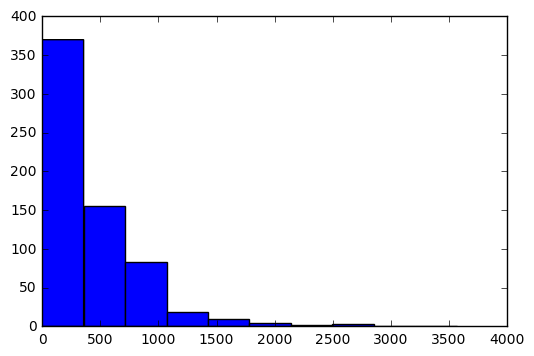

In [24]:
######################################
#                 13                 #
######################################

## Make histograms of the three metrics we looked at earlier for both
## students who passed the subway project and students who didn't. You
## might also want to make histograms of any other metrics you examined.

import matplotlib.pyplot as plt
%matplotlib inline

#"Total Minutes Visited in First Week by Students who Passed Project 1"
plt.hist(total_minutes_visited_passing)
print_stats("Total Minutes Visited in First Week by Students who Passed Project 1", total_minutes_visited_passing)


Total Minutes Visited in First Week by Students who Failed Project 1
Mean: 143.326474267
Standard deviation: 269.538619011
Minimum: 0.0
Maximum: 1768.52274933


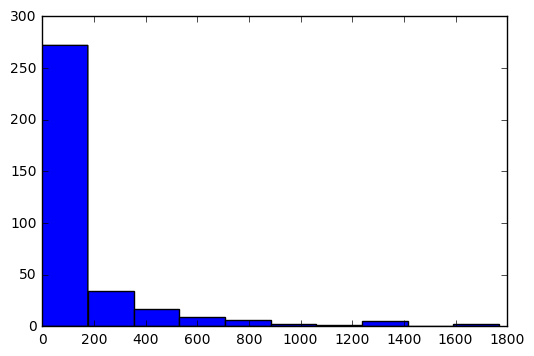

In [25]:
plt.hist(total_minutes_visited_non_passing)
print_stats("Total Minutes Visited in First Week by Students who Failed Project 1", total_minutes_visited_non_passing)


Total Number of Lessons Completed in First Week by Students who Passed Project 1
Mean: 2.05255023184
Standard deviation: 3.14222705558
Minimum: 0
Maximum: 36


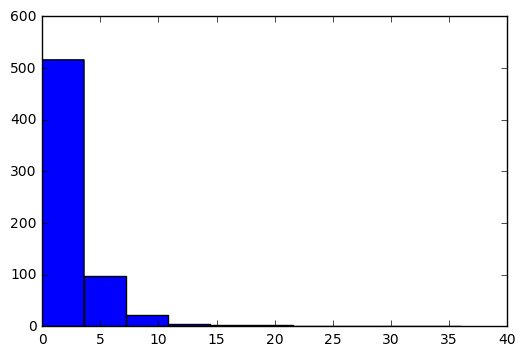

In [26]:
plt.hist(total_lessons_completed_passing)
print_stats("Total Number of Lessons Completed in First Week by Students who Passed Project 1", total_lessons_completed_passing)


Total Number of Lessons Completed in First Week by Students who Failed Project 1
Mean: 0.862068965517
Standard deviation: 2.54915994183
Minimum: 0
Maximum: 27


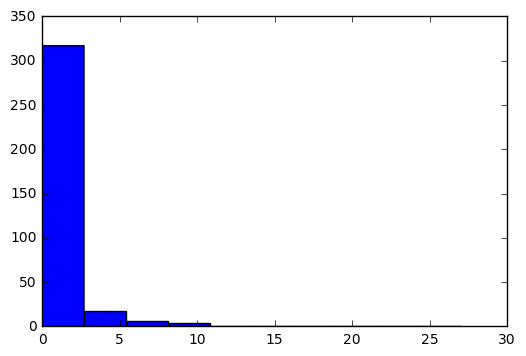

In [27]:
plt.hist(total_lessons_completed_non_passing)
print_stats("Total Number of Lessons Completed in First Week by Students who Failed Project 1", total_lessons_completed_non_passing)


Number of Days Visted in the First Week by Students who Passed Project 1
Mean: 3.38485316847
Standard deviation: 2.25882147092
Minimum: 0
Maximum: 7


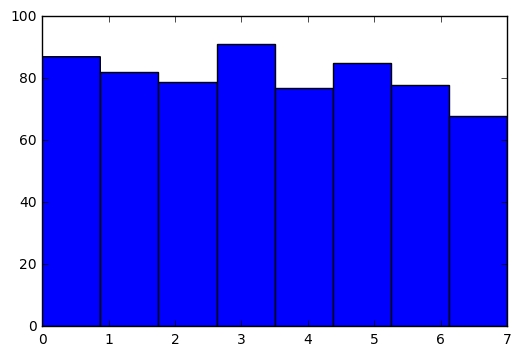

In [28]:
plt.hist(num_days_visited_passing, bins=8)
print_stats("Number of Days Visted in the First Week by Students who Passed Project 1", num_days_visited_passing)


Number of Days Visted in the First Week by Students who Failed Project 1
Mean: 1.90517241379
Standard deviation: 1.90573144136
Minimum: 0
Maximum: 7


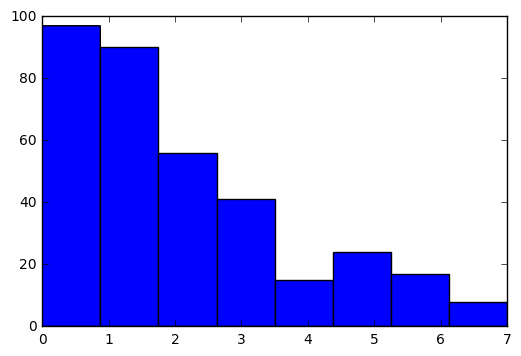

In [29]:

plt.hist(num_days_visited_non_passing, bins=8)
print_stats("Number of Days Visted in the First Week by Students who Failed Project 1", num_days_visited_non_passing)


## Improving Plots and Sharing Findings

In [60]:
######################################
#                 14                 #
######################################

## Make a more polished version of at least one of your visualizations
## from earlier. Try importing the seaborn library to make the visualization
## look better, adding axis labels and a title, and changing one or more
## arguments to the hist() function.


In [61]:
import seaborn as sns

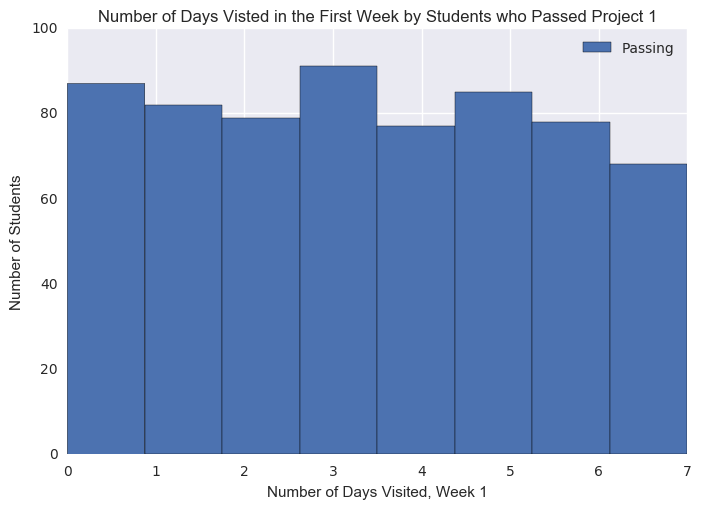

In [62]:
plt.hist(num_days_visited_passing, bins=8)
plt.title("Number of Days Visted in the First Week by Students who Passed Project 1")
plt.xlabel("Number of Days Visited, Week 1")
plt.ylabel("Number of Students")
plt.legend(['Passing', 'Failing'])


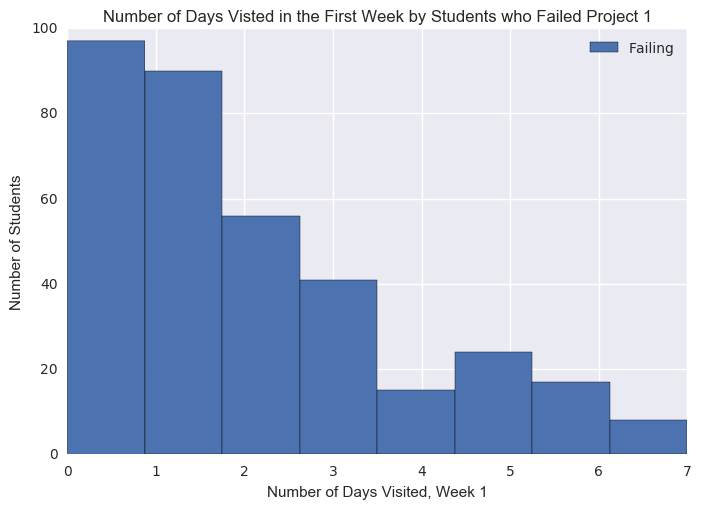

In [69]:
plt.hist(num_days_visited_non_passing, bins=8)
plt.title("Number of Days Visted in the First Week by Students who Failed Project 1")
plt.xlabel("Number of Days Visited, Week 1")
plt.ylabel("Number of Students")
plt.legend(['Failing'])


0.0
3564.7332645


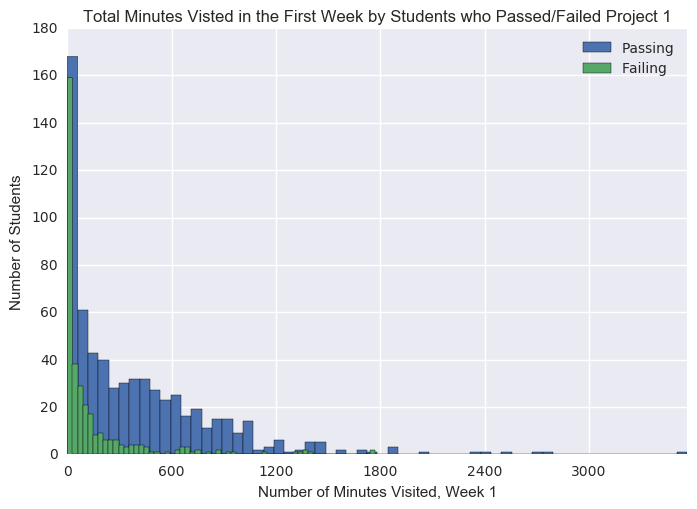

In [64]:
#"Total Minutes Visited in First Week by Students who Passed Project 1"
base_number_of_bins = 60 #53.7867078825

#scale bins for passing and failing students to be the APPROXIMATELY the same width, 
#ie account for difference in total number of students in each set
# rounding to integer caused bins to be smis-align, cumulatively along the x-axis, thus: Abandon Idea!
passing_scale = 1.0
failing_scale = 1.0 #num_failing_students*1.0 / num_passing_students
# print failing_scale
# print 1.0/failing_scale

num_bins_passing = int(base_number_of_bins*passing_scale)
num_bins_failing = int(base_number_of_bins*failing_scale)

min_number_minutes = np.min(total_minutes_visited)
print min_number_minutes
max_number_minutes = np.max(total_minutes_visited)
print max_number_minutes
plt.xticks(range(int(np.min(total_minutes_visited)), int(np.max(total_minutes_visited))+1, 600))


plt.hist(total_minutes_visited_passing, num_bins_passing)
plt.hist(total_minutes_visited_non_passing, num_bins_failing)
plt.title("Total Minutes Visted in the First Week by Students who Passed/Failed Project 1")
plt.xlabel("Number of Minutes Visited, Week 1")
plt.ylabel("Number of Students")
plt.legend(['Passing', 'Failing'])



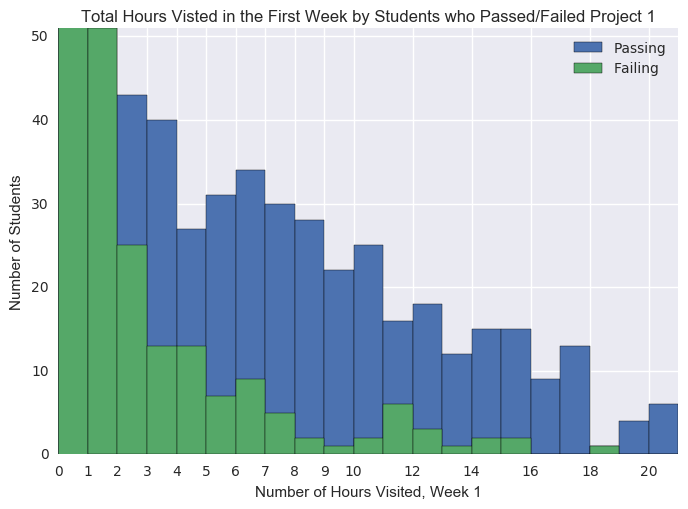

In [128]:
# #"Total Minutes Visited in First Week by Students who Passed Project 1"
# base_number_of_bins = 60 # hourly bins

min_number_minutes = 0
max_number_minutes = 1200 #20 hours  #1800 #30 hours
# step = 120 #number of minutes represented by each tick (and thusly each label)
# plt.xticks(range(int(np.min(total_minutes_visited)), int(np.max(total_minutes_visited))+1, step))

# hide every other label
# dunno proper syntax for hist labels, basic idea is here though
#plt.setp(plt.hist.ax.get_xticklabels()[::2], visible=False)

# change scale from minutes to hours
total_hours_visited_passing     = [mins/60.0 for mins in total_minutes_visited_passing]
total_hours_visited_non_passing = [mins/60.0 for mins in total_minutes_visited_non_passing]

start_num_hours = 0  #int(min_number_minutes/60)
end_num_hours   = 20 + 1 # int(max_number_minutes/60)+1
step1 = 1        #number of hours represented by each tick
step2 = 2        #number of hours represented by each tick (and thusly each label) -- prevent overlapping labels

# set number of bins equal to the total number of bars in chart --> hourly
base_number_of_bins = end_num_hours - start_num_hours  # 60 # hourly bins

# first 10 hours tick each hour, then label/tick even number of hours only (prevent overlapping labels)
time_range_to_plot = range(start_num_hours, 10, 1) + range(10, end_num_hours+1, 2)
plt.xticks(time_range_to_plot)
    
# doesn't work   : 
# try centering the label to each bar in the histogram
# def bins_labels(bins, **kwargs):
#     bin_w = (max(bins) - min(bins)) / (len(bins) - 1)
#     plt.xticks(np.arange(min(bins)+bin_w/2, max(bins), bin_w), bins, **kwargs)
#     #plt.xlim(bins[0], bins[-1])
# bins_labels(range(start_num_hours, end_num_hours))

# cut y-axis off at end_num_students, allowing to zoom in (miinimize effect of "0 hours" on scale chosen for plot)
end_num_students = 50 + 1
plt.yticks(range(0, end_num_students, 10))
plt.ylim([0, end_num_students])

plt.hist(total_hours_visited_passing,     base_number_of_bins, range=[start_num_hours, end_num_hours])
plt.hist(total_hours_visited_non_passing, base_number_of_bins, range=[start_num_hours, end_num_hours])
plt.title("Total Hours Visted in the First Week by Students who Passed/Failed Project 1")
plt.xlabel("Number of Hours Visited, Week 1")
plt.ylabel("Number of Students")
plt.legend(['Passing', 'Failing'])


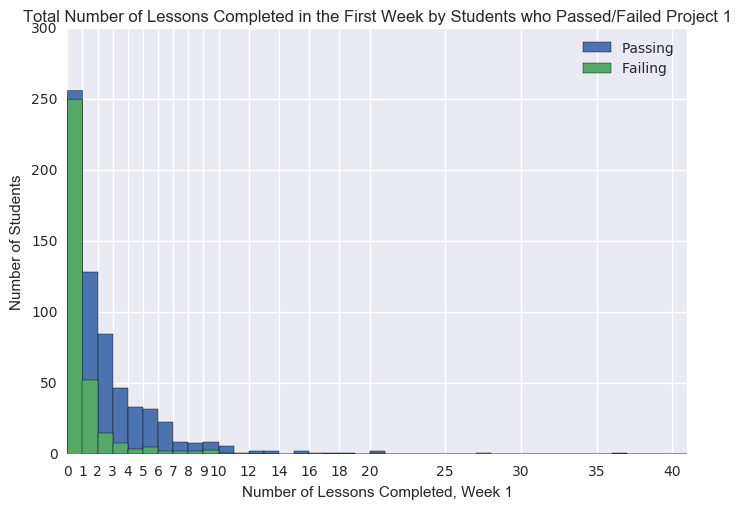

In [108]:
num_bins=41
lessons_to_plot = [0,41]
# step size of labels and ticks: print every lesson number in the range I'm plotting

# ticks/labels: every lesson for first 10 lessons, every other lesson for 10-20 lessons, then every 5 lessons
plt.xticks(range(0, 10, 1)+range(10, 20, 2)+range(20, 41, 5))

plt.hist(total_lessons_completed_passing, bins=num_bins, range=[0,41])
plt.hist(total_lessons_completed_non_passing, bins=num_bins, range=[0,41])

plt.title("Total Number of Lessons Completed in the First Week by Students who Passed/Failed Project 1")
plt.xlabel("Number of Lessons Completed, Week 1")
plt.ylabel("Number of Students")
plt.legend(['Passing', 'Failing'])


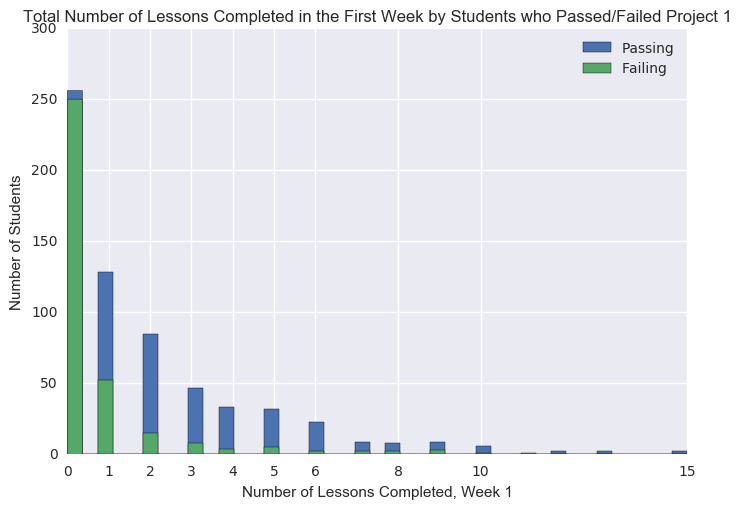

In [79]:
num_bins=41
# zoom in to completion of 0 to 15 lessons
lessons_to_plot = [0,15]

# step size of labels and ticks: print every lesson number in the range I'm plotting
# plt.xticks(range(0, 20, 1))
# ticks/labels: every lesson for first 10 lessons, every other lesson for 10-20 lessons, then every 5 lessons
plt.xticks(range(0, 6, 1)+range(6, 10, 2)+range(10, 41, 5))


plt.hist(total_lessons_completed_passing, bins=num_bins, range=lessons_to_plot)
plt.hist(total_lessons_completed_non_passing, bins=num_bins, range=lessons_to_plot)

plt.title("Total Number of Lessons Completed in the First Week by Students who Passed/Failed Project 1")
plt.xlabel("Number of Lessons Completed, Week 1")
plt.ylabel("Number of Students")
plt.legend(['Passing', 'Failing'])


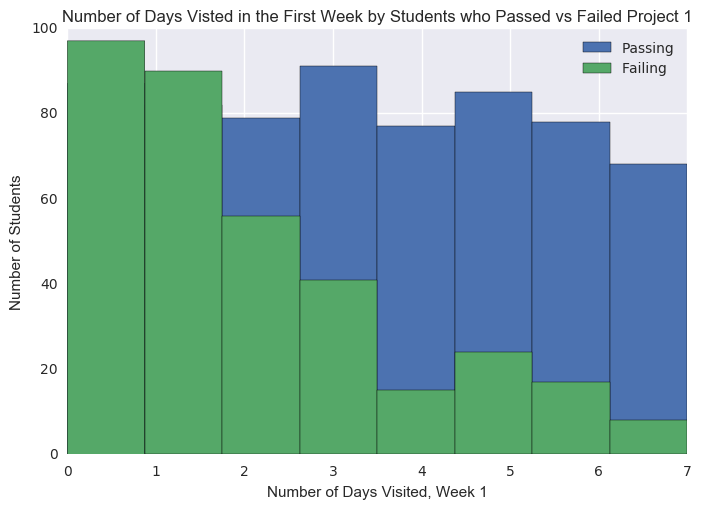

In [110]:
plt.hist(num_days_visited_passing, bins=8)
plt.hist(num_days_visited_non_passing, bins=8)

plt.title("Number of Days Visted in the First Week by Students who Passed vs Failed Project 1")
plt.xlabel("Number of Days Visited, Week 1")
plt.ylabel("Number of Students")

plt.legend(['Passing', 'Failing'])


